Importing python libraries 

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
#Read Datasets using Pandas
df = pd.read_csv('CAR Price Dataset.csv')

In [3]:
df.head() # Display Datasets From Top 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
df.columns # Displaying All Columns Name 

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [10]:
# Checking missing values in each column 
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [12]:
df.info() # summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [13]:
# Get summary for numerical columns
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [70]:
# List of numerical columns 
numerical_cols = ['selling_price', 'km_driven']

# Loop through the numerical columns and check for unusual (non-numeric) values
for col in numerical_cols:
    # Convert the column to numeric, invalid parsing will be set as NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Check for rows with NaN values (which indicates invalid data)
    unusual_values = df[df[col].isna()]
    
    # Print the rows that contain invalid values
    if not unusual_values.empty:
        print(f"Unusual values in column '{col}':")
        print(unusual_values)
        
    else:
        print(f'NO any Unsual values in {col}')

NO any Unsual values in selling_price
NO any Unsual values in km_driven


Checking how the numerical columns are distributed and understand their range

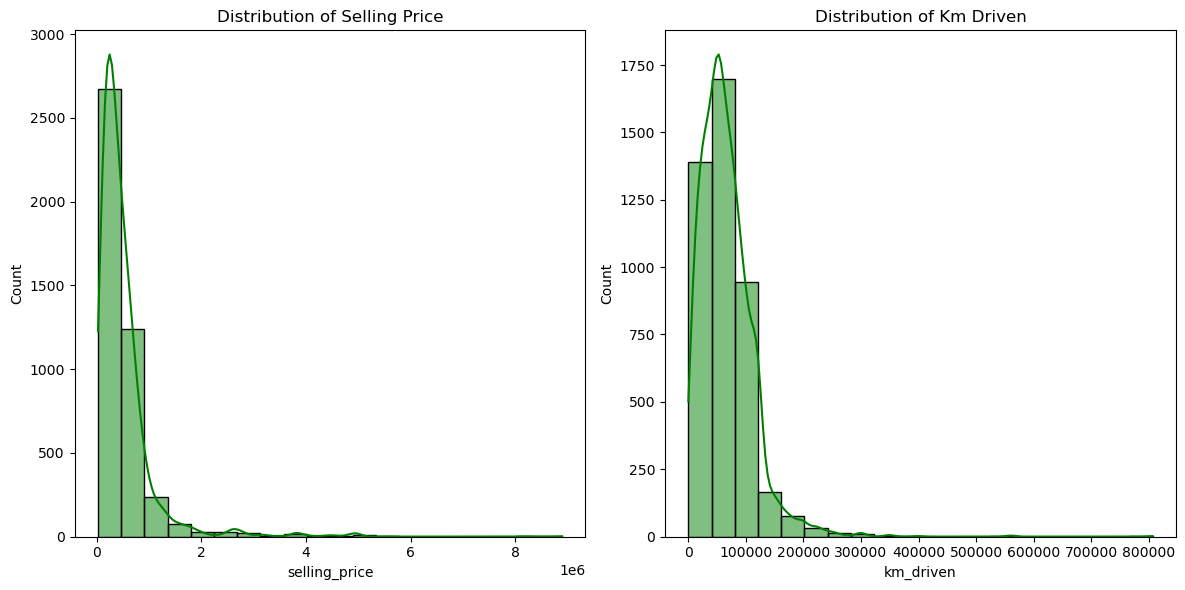

In [63]:
# Set up a figure with subplots 
plt.figure(figsize=(12, 6))

# Plot for selling_price
plt.subplot(1, 2, 1)  # In same row and first column
sns.histplot(df['selling_price'], bins=20, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Selling Price')

# Plot for km_driven
plt.subplot(1, 2, 2) # same row second column
sns.histplot(df['km_driven'], bins=20, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Km Driven')

plt.tight_layout()

# Show the plot
plt.show()


Visualizing categorical columns using countplots 

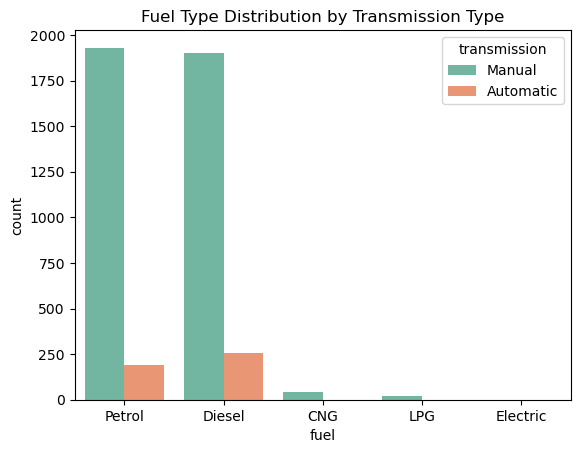

In [49]:
# Visualize Fuel Type Distribution 
sns.countplot(data=df, x='fuel', hue='transmission',  palette='Set2')
plt.title('Fuel Type Distribution by Transmission Type')
plt.show()

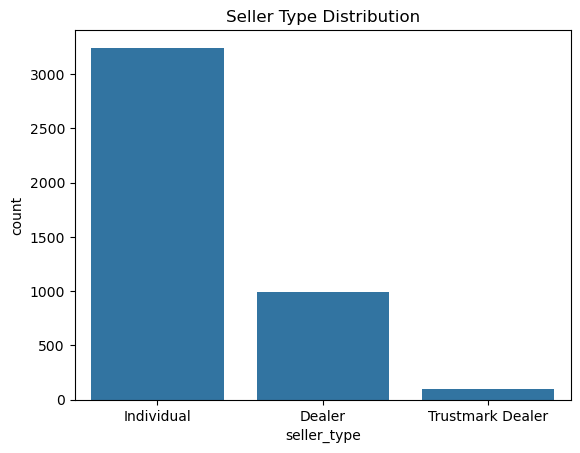

In [50]:
sns.countplot(data=df, x='seller_type')
plt.title('Seller Type Distribution')
plt.show()

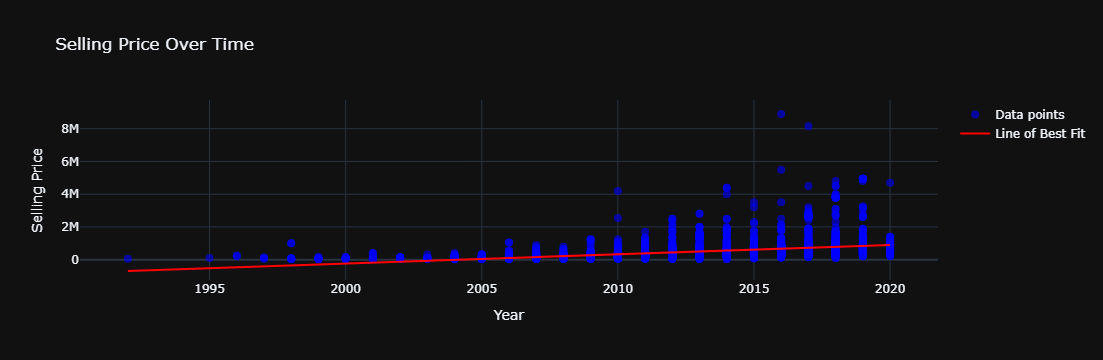

In [57]:
import numpy as np
import plotly.graph_objects as go
import pandas as pd

# Ensure the 'year' column is numeric
df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year

# Scatter plot with plotly
fig = go.Figure()

# Add scatter points
fig.add_trace(go.Scatter(
    x=df['year'], 
    y=df['selling_price'], 
    mode='markers',  # Only markers
    marker=dict(color='blue', opacity=0.6, size=8),  # Styling markers
    name='Data points'  # Label for the data points
))

# Fit a linear regression (line of best fit) using NumPy
slope, intercept = np.polyfit(df['year'], df['selling_price'], 1)
line = slope * df['year'] + intercept  # Calculate the line of best fit

# Add the line of best fit
fig.add_trace(go.Scatter(
    x=df['year'], 
    y=line,  # The regression line
    mode='lines',  # Line mode (no markers)
    line=dict(color='red', width=2),  # Red line of best fit
    name='Line of Best Fit'  # Label for the line
))

# Update layout with titles and labels
fig.update_layout(
    title='Selling Price Over Time',
    xaxis_title='Year',
    yaxis_title='Selling Price',
    template='plotly_dark',  # Dark background (optional)
    hovermode='closest'  # Show data points when hovering
)

# Show the plot
fig.show()


Checking correlation for numerical columns

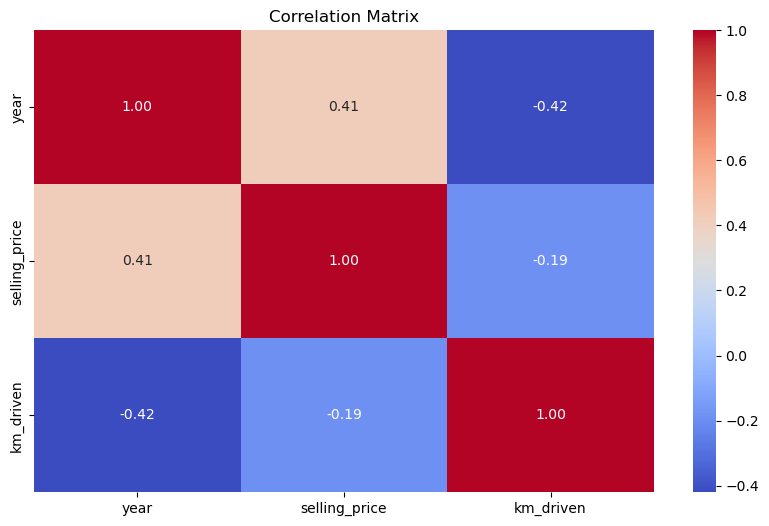

In [59]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Feature Engineering, we can create new features that might help improve the model.

In [75]:
# Feature engineering: Create new columns

# Price per kilometer
df['price_per_km'] = df['selling_price'] / df['km_driven']

# Display the new columns
print(df[['year', 'price_per_km']].tail())


      year  price_per_km
4335  2014      5.124987
4336  2014      5.124987
4337  2009      1.325301
4338  2016      9.611111
4339  2016      5.625000


In [101]:
print(df['fuel'].unique())
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [104]:
# One-Hot Encoding for categorical variables
encoder = OneHotEncoder(sparse_output=False)  # Ensure output is a dense array

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(df[['owner','fuel', 'seller_type', 'transmission']])

# Convert the encoded data into a DataFrame for easier readability
encoded_columns = encoder.get_feature_names_out(['owner','fuel', 'seller_type', 'transmission'])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Add the original numerical columns back into the encoded DataFrame
df_encoded = pd.concat([df[['name', 'year', 'selling_price', 'km_driven', 'price_per_km']], encoded_df], axis=1)

# Convert Boolean values (True/False) to 1/0 for consistency
df_encoded = df_encoded.astype({col: 'int' for col in encoded_df.columns})

# Display the final encoded DataFrame
df_encoded

,name,year,selling_price,km_driven,price_per_km,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,Maruti 800 AC,2007,60000,70000,0.857143,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,2.700000,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,6.000000,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,Datsun RediGO T Option,2017,250000,46000,5.434783,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,3.191489,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,5.124987,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,5.124987,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
4337,Maruti 800 AC BSIII,2009,110000,83000,1.325301,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,9.611111,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1


In [108]:
# Using StandardScaler to scale the features
scaler = StandardScaler()

# List of numerical columns to scale
numerical_cols_to_scale = ['selling_price', 'km_driven', 'price_per_km']

# Apply scaling
df_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_encoded[numerical_cols_to_scale])

# Display the scaled DataFrame
df_encoded.head()


,name,year,selling_price,km_driven,price_per_km,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,Maruti 800 AC,2007,-0.767746,0.081139,-0.022930,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
1,Maruti Wagon R LXI Minor,2007,-0.638096,-0.347689,-0.022445,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
2,Hyundai Verna 1.6 SX,2012,0.165731,0.724381,-0.021577,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,Datsun RediGO T Option,2017,-0.439300,-0.433455,-0.021725,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,Honda Amaze VX i-DTEC,2014,-0.093568,1.603479,-0.022315,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


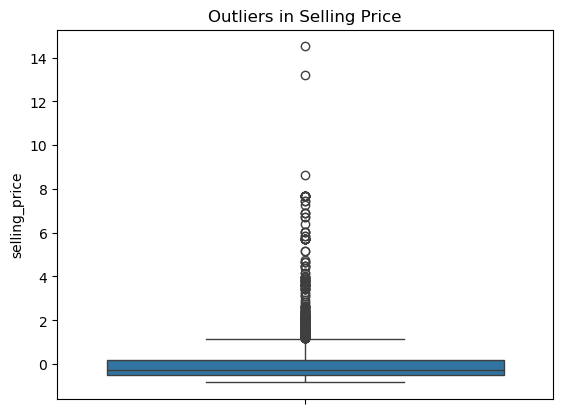

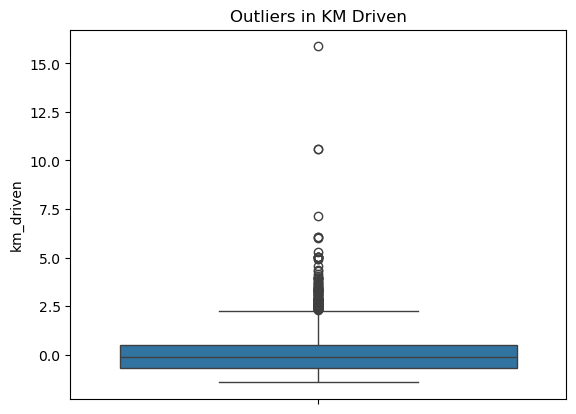

In [109]:
# Visualize numerical columns for outliers using boxplots
sns.boxplot(data=df_encoded['selling_price'])
plt.title('Outliers in Selling Price')
plt.show()

sns.boxplot(data=df_encoded['km_driven'])
plt.title('Outliers in KM Driven')
plt.show()

In [113]:
from scipy import stats

# Calculate Z-scores for the numerical columns
z_scores = np.abs(stats.zscore(df_encoded[numerical_cols_to_scale]))

# Filter out rows where any feature has a Z-score > 3 (i.e., outliers)
df_no_outliers = df_encoded[(z_scores < 3).all(axis=1)]

# Display DataFrame after removing outliers
df_no_outliers.head()


,name,year,selling_price,km_driven,price_per_km,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,Maruti 800 AC,2007,-0.767746,0.081139,-0.022930,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
1,Maruti Wagon R LXI Minor,2007,-0.638096,-0.347689,-0.022445,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
2,Hyundai Verna 1.6 SX,2012,0.165731,0.724381,-0.021577,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,Datsun RediGO T Option,2017,-0.439300,-0.433455,-0.021725,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,Honda Amaze VX i-DTEC,2014,-0.093568,1.603479,-0.022315,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


In [114]:
# Split the data into features (X) and target (y)
X = df_encoded.drop(columns=['selling_price'])  # Assuming 'selling_price' is the target variable
y = df_encoded['selling_price']

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the split data shapes
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (3472, 19)
Test data shape: (868, 19)
